In [ ]:
import sys
import os

# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import custom modules
from src.data_loader import DataLoader
from src.eda import EDA

print("Setup complete. Project root added to path.")
print(f"Project root: {project_root}")

Setup complete. Project root added to path.
Project root: c:\Users\Administrator\Desktop\10Academy\Week 4\Week4-Credit-Risk-Model


In [ ]:
# Instantiate the data loader and load the data
loader = DataLoader()
df = loader.load()

# Quick preview
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

2025-12-11 16:02:15,205 - src.data_loader - INFO - DataLoader initialized with path: C:\Users\Administrator\Desktop\10Academy\Week 4\Week4-Credit-Risk-Model\data\data.csv
2025-12-11 16:02:15,207 - src.data_loader - INFO - Loading data from: C:\Users\Administrator\Desktop\10Academy\Week 4\Week4-Credit-Risk-Model\data\data.csv
2025-12-11 16:02:15,214 - src.data_loader - INFO - Detected delimiter: ','
2025-12-11 16:02:15,859 - src.data_loader - INFO - Loaded 95,662 rows and 16 columns
2025-12-11 16:02:16,063 - src.data_loader - INFO - Data loading and basic preprocessing completed successfully.


Dataset loaded successfully!
Shape: 95,662 rows × 16 columns


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


2025-12-11 16:02:18,145 - src.eda - INFO - EDA instance created with data shape: (95662, 16)


1. OVERVIEW OF THE DATA
Number of rows: 95,662
Number of columns: 16

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 

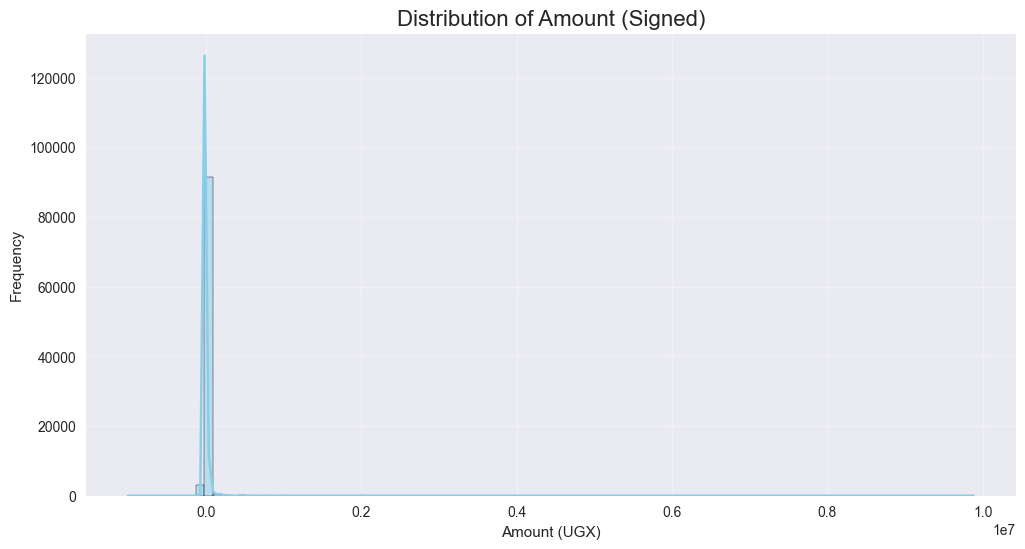

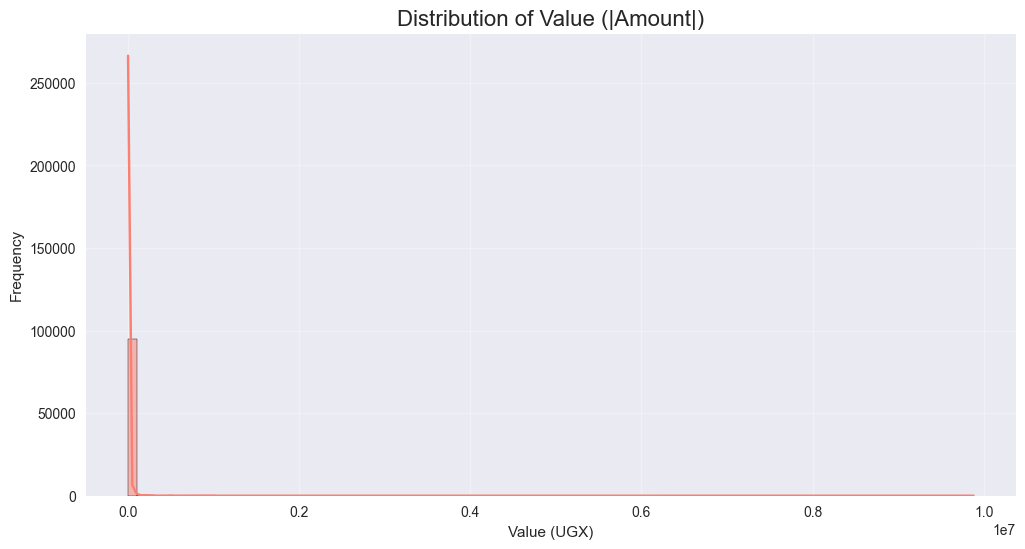

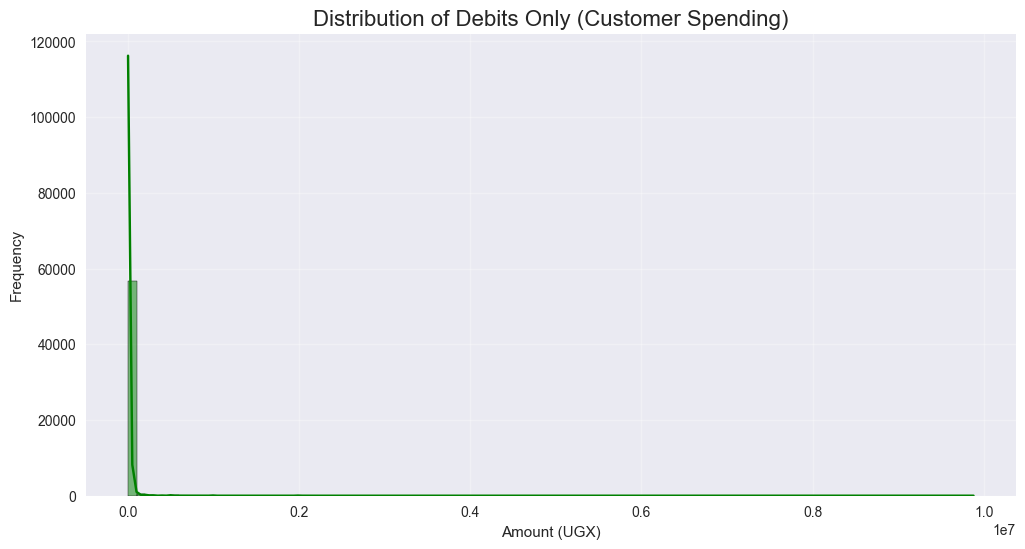

Skewness:
Amount    51.10
Value     51.29
dtype: float64

4. DISTRIBUTION OF CATEGORICAL FEATURES


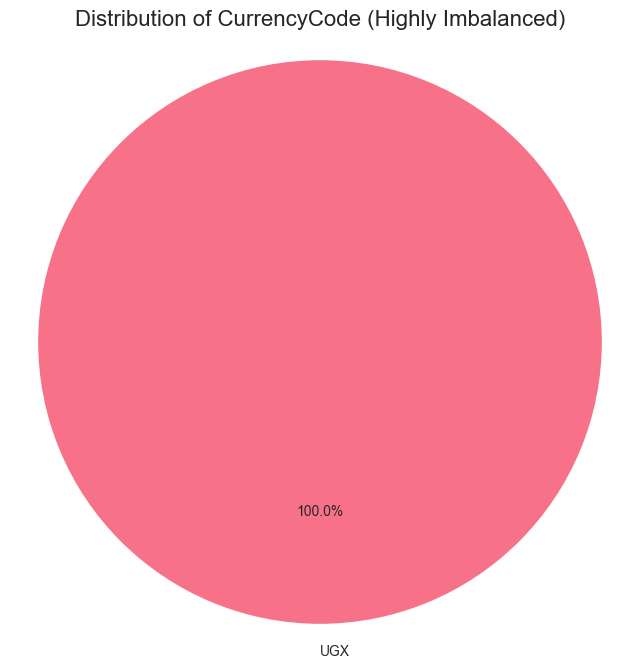

CurrencyCode: Dominant category = UGX (100.0%)


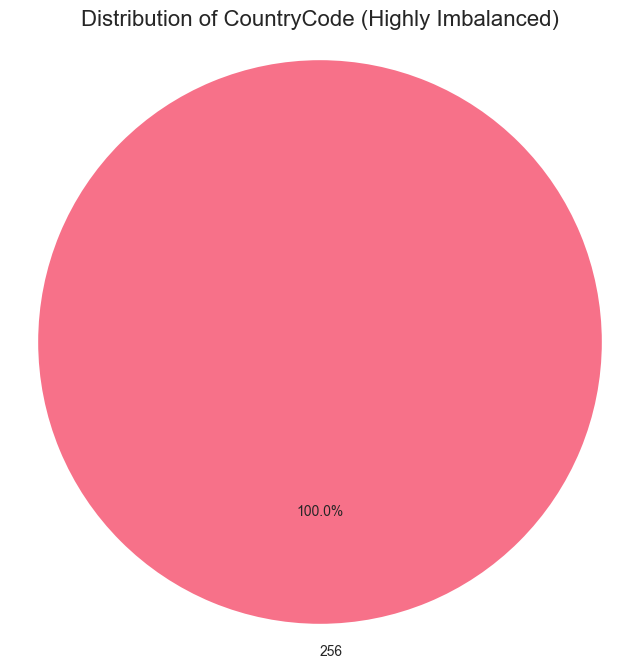

CountryCode: Dominant category = 256 (100.0%)


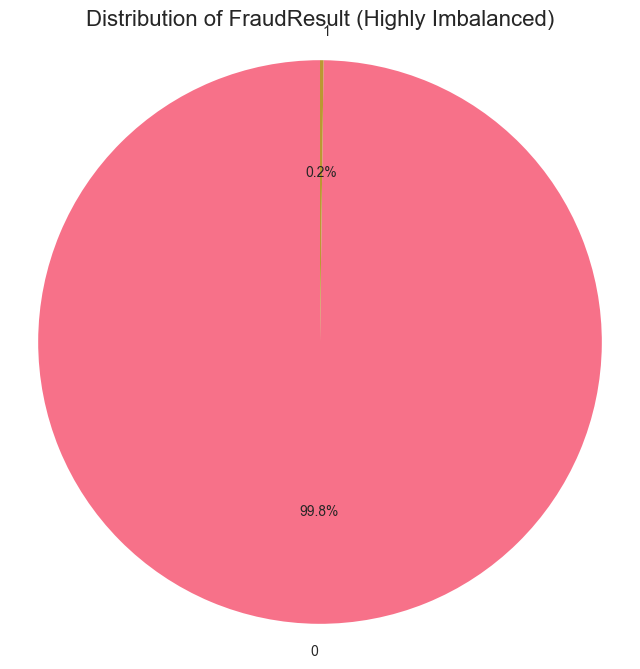

FraudResult: Dominant category = 0 (99.8%)


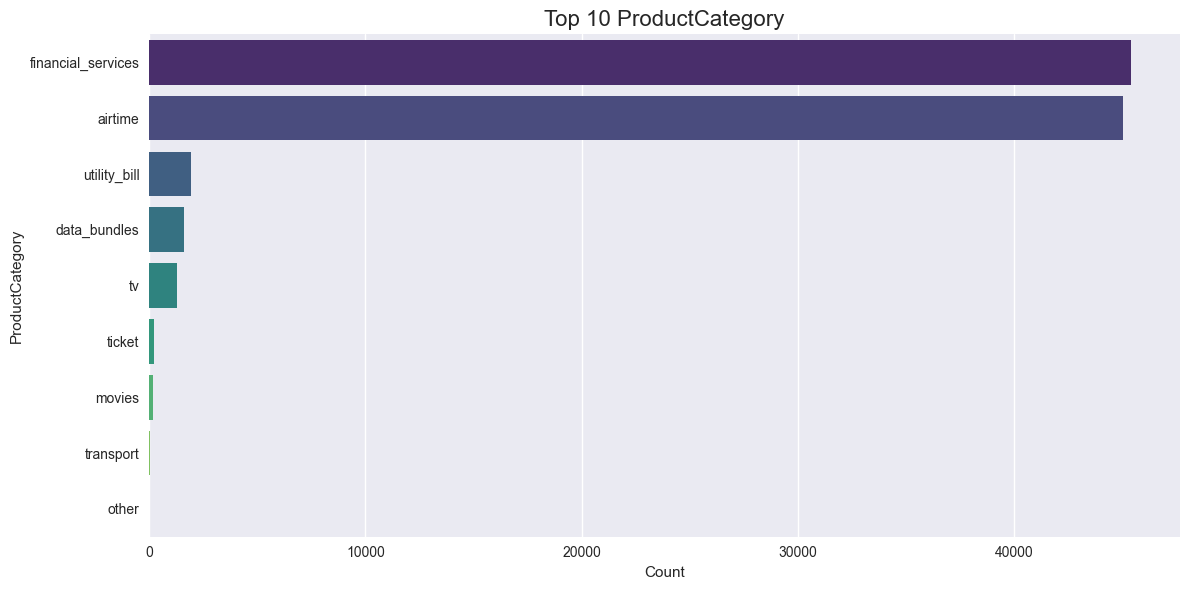

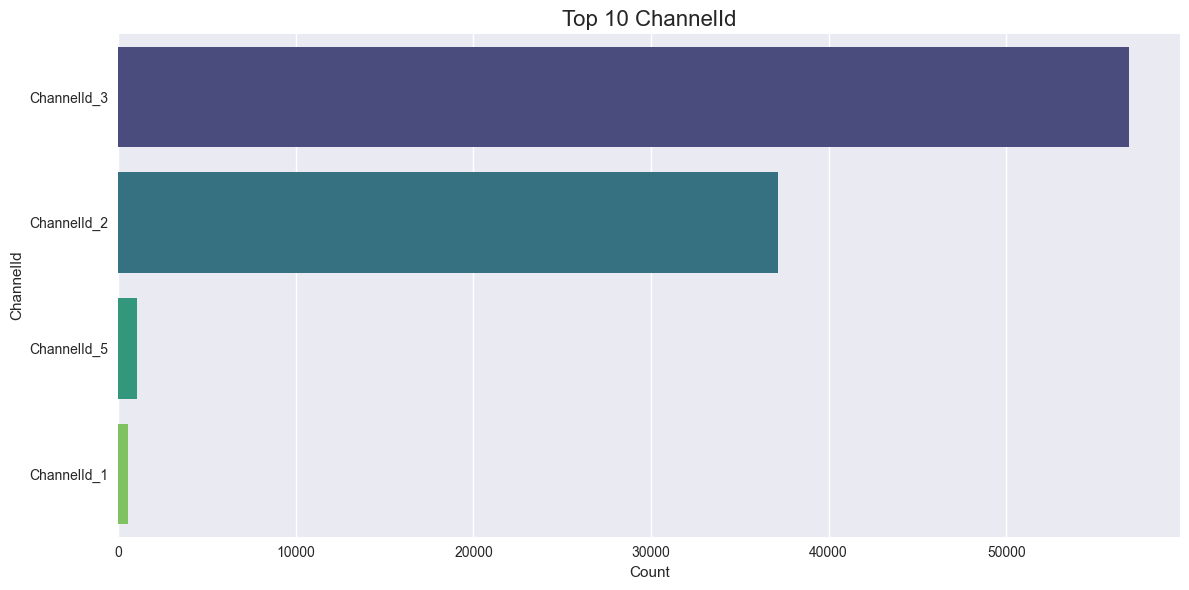

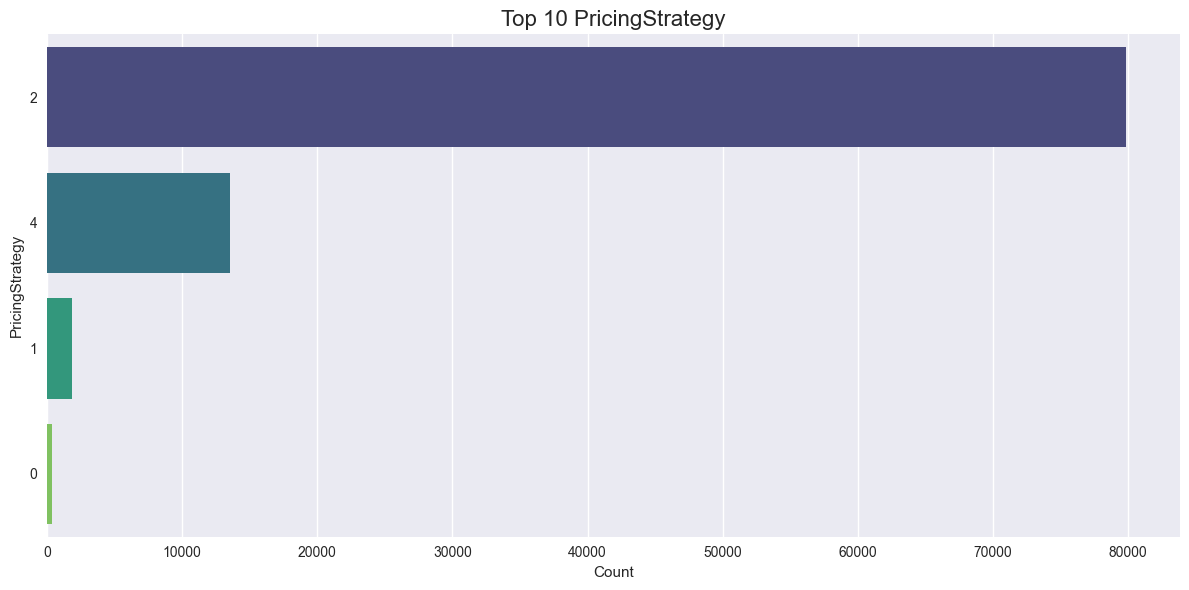

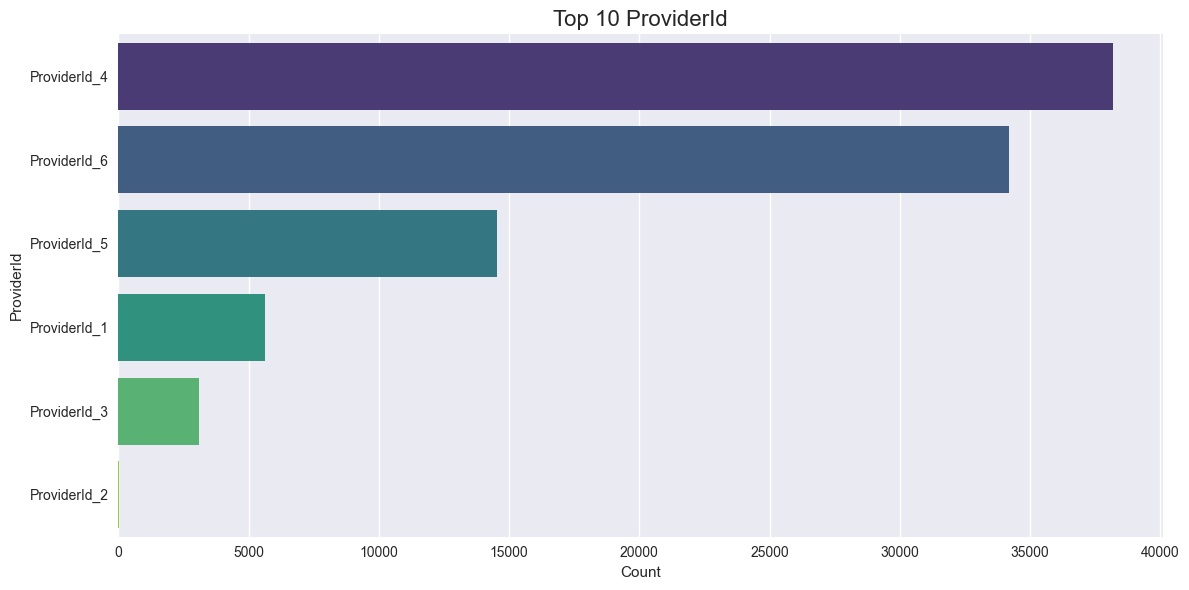


5. CORRELATION ANALYSIS


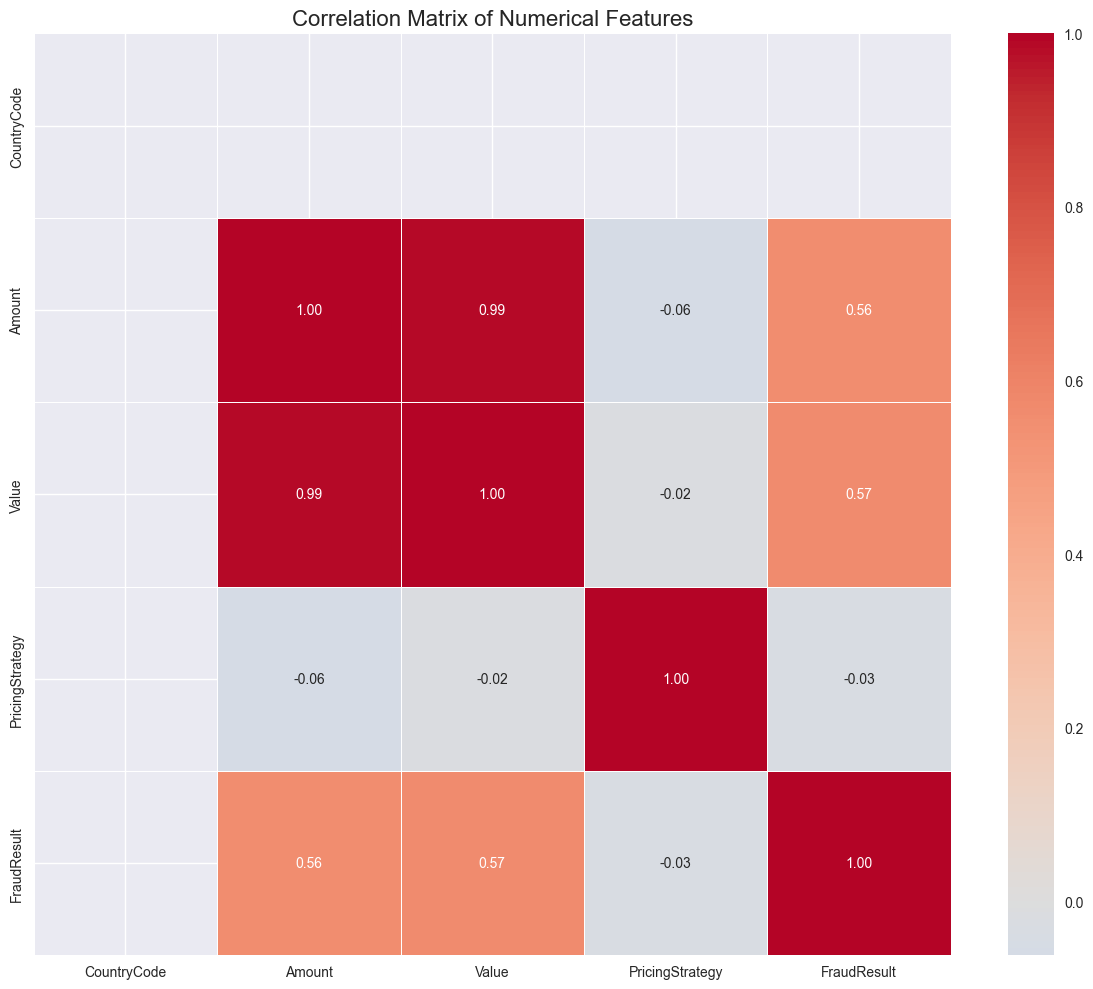


6. IDENTIFYING MISSING VALUES
No missing values found in the dataset.

7. OUTLIER DETECTION


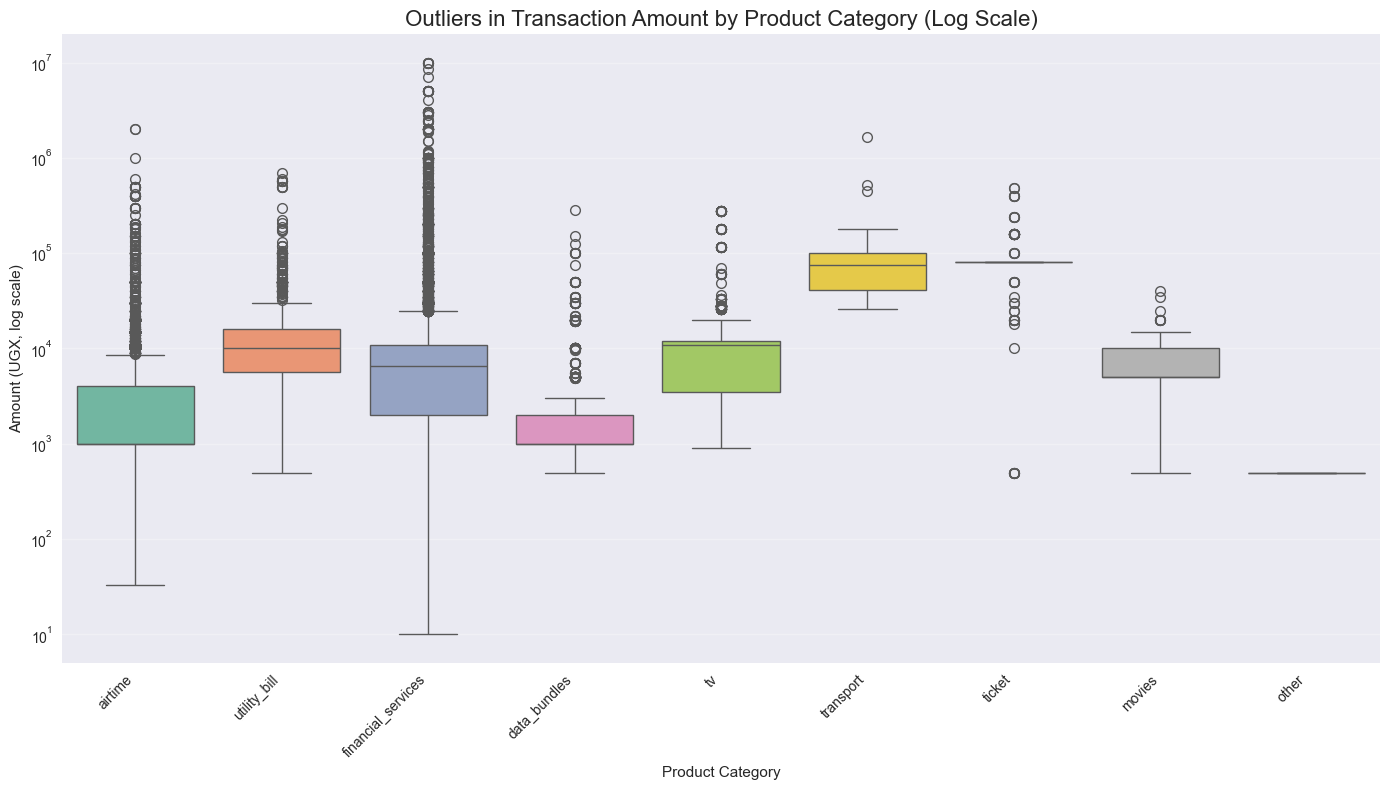


TOP 5 MOST IMPORTANT INSIGHTS
1. FraudResult is extremely imbalanced (~0.13%) — cannot be used as a direct default proxy.
2. Nearly all transactions are in Uganda (CountryCode 256, Currency UGX) — model can be country-specific.
3. Transaction amounts are heavily right-skewed with a long tail — log transformation and robust scaling will be necessary.
4. Clear customer behavioral segments visible (high vs low frequency/spend) — ideal for RFM clustering to create a proxy target.
5. Value column is exactly |Amount| — redundant; use only positive Amount (debits) for monetary features to avoid double-counting.


In [3]:
# Create EDA instance and run the complete analysis
eda = EDA(df)
eda.run_full_eda()